# 주택가격 예측 모델

## 1단계 : 파일 불러와 데이터 확인하기

In [14]:
import pandas as pd

data = pd.read_csv("/home/woo/kuBig2025/orange33/house-prices-advanced-regression-techniques/train.csv")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [15]:
print(data.head()) 

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [16]:
!pip install seaborn


Defaulting to user installation because normal site-packages is not writeable


## 2단계: 수치형 변수와 SalePrice의 상관관계 확인하기

### 2-1단계: 상관관계가 높은 변수들만 추출하기

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기
data = pd.read_csv("/home/woo/kuBig2025/orange33/house-prices-advanced-regression-techniques/train.csv")

# 수치형 데이터만 추출
numeric_df = data.select_dtypes(include=['int64', 'float64'])

# SalePrice와의 상관관계 계산
corr_matrix = numeric_df.corr()

# 상관계수 높은 순으로 정렬 (절댓값 기준)
corr_with_price = corr_matrix['SalePrice'].abs().sort_values(ascending=False)

# 상위 10개 출력
print(corr_with_price.head(11))  # SalePrice 포함해서 11개


SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


In [46]:
import matplotlib
print(matplotlib.get_cachedir())



/home/woo/.cache/matplotlib


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

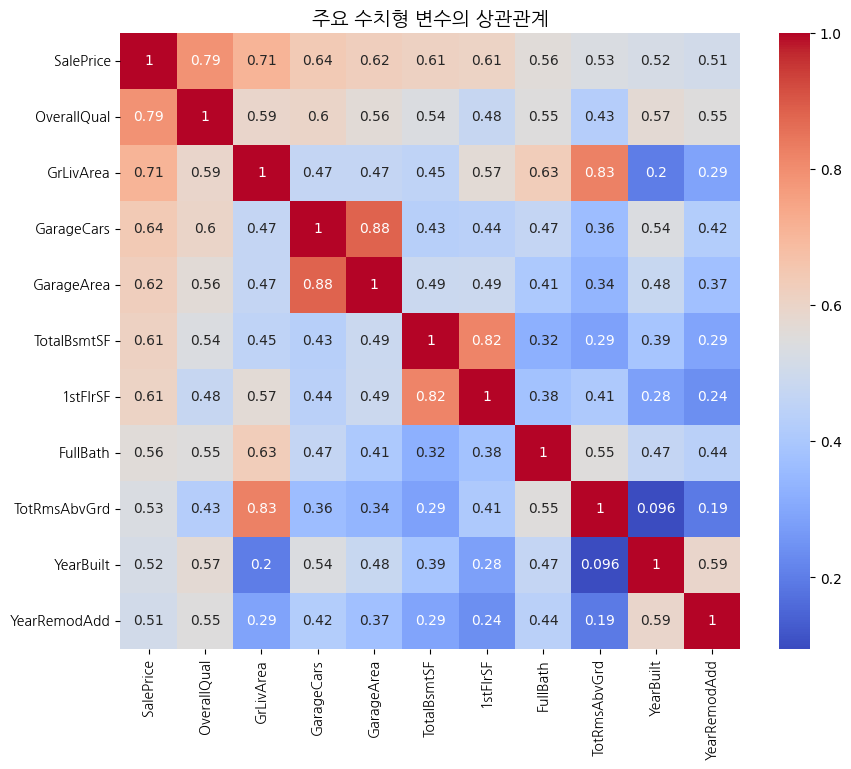

In [49]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# ✅ 복사한 폰트 경로
font_path = "./NanumGothic.ttf"  # 현재 .ipynb 파일과 같은 디렉토리라고 가정
font_prop = fm.FontProperties(fname=font_path)

# 📊 히트맵 예시
plt.figure(figsize=(10, 8))

important_cols = [
    'SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
    'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd'
]

sns.heatmap(numeric_df[important_cols].corr(), annot=True, cmap='coolwarm')

# ✅ fontproperties를 직접 넘겨줌
plt.title("주요 수치형 변수의 상관관계", fontproperties=font_prop, fontsize=14)
plt.xticks(fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)

plt.show()


### 2-2단계: 결측치가 있는 데이터 확인하기

In [19]:
# 각 변수별 결측값 개수 확인
missing_counts = data[important_cols].isnull().sum()

# 결측값이 있는 변수만 출력
print(missing_counts[missing_counts > 0])


Series([], dtype: int64)


In [20]:
# 관심 있는 주요 변수 목록
important_cols = [
    'SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
    'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd'
]

# 각 컬럼별 결측치 개수 확인 (조건 없이 전부 출력)
missing_counts = data[important_cols].isnull().sum()

# 보기 좋게 출력
print(missing_counts)


SalePrice       0
OverallQual     0
GrLivArea       0
GarageCars      0
GarageArea      0
TotalBsmtSF     0
1stFlrSF        0
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
YearRemodAdd    0
dtype: int64


In [21]:
# 결측치 비율까지 보기 (%)
missing_ratio = (data.isnull().sum() / len(data)) * 100
missing_df = pd.DataFrame({
    'Missing Count': data.isnull().sum(),
    'Missing Ratio (%)': missing_ratio
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values(by='Missing Ratio (%)', ascending=False)

# 결측치 개수 확인
print(f"전체 컬럼 수: {data.shape[1]}")
print(f"결측치 있는 컬럼 수: {missing_df.shape[0]}\n")

print(missing_df)



전체 컬럼 수: 81
결측치 있는 컬럼 수: 19

              Missing Count  Missing Ratio (%)
PoolQC                 1453          99.520548
MiscFeature            1406          96.301370
Alley                  1369          93.767123
Fence                  1179          80.753425
MasVnrType              872          59.726027
FireplaceQu             690          47.260274
LotFrontage             259          17.739726
GarageType               81           5.547945
GarageYrBlt              81           5.547945
GarageFinish             81           5.547945
GarageQual               81           5.547945
GarageCond               81           5.547945
BsmtFinType2             38           2.602740
BsmtExposure             38           2.602740
BsmtFinType1             37           2.534247
BsmtCond                 37           2.534247
BsmtQual                 37           2.534247
MasVnrArea                8           0.547945
Electrical                1           0.068493


In [22]:
import pandas as pd

# 데이터 불러오기
data = pd.read_csv("/home/woo/kuBig2025/orange33/house-prices-advanced-regression-techniques/train.csv")

# 결측치 있는 컬럼 리스트
missing_cols = [
    'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType',
    'FireplaceQu', 'LotFrontage', 'GarageType', 'GarageYrBlt',
    'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtFinType2',
    'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual',
    'MasVnrArea', 'Electrical'
]

# SalePrice 포함해서 추출
subset = data[missing_cols + ['SalePrice']].copy()  # 복사본 명시적으로 생성

# object 타입 컬럼 인코딩
for col in subset.select_dtypes(include='object').columns:
    subset.loc[:, col] = pd.factorize(subset[col])[0]  # 경고 없이 안전하게 처리

# 상관계수 계산
correlations = subset.corr(numeric_only=True)['SalePrice'].sort_values(key=abs, ascending=False)

# 출력
print(correlations)


SalePrice      1.000000
GarageYrBlt    0.486362
MasVnrArea     0.477493
LotFrontage    0.351799
Name: SalePrice, dtype: float64


#### 2-2-1단계: 수영장 품질(PoolQC) 변수 확인하여, 가장 높은 품질이 측정된 샘플의 주택가격이 전체 데이터에서 상위 몇%에 해당하는지 확인하기

In [23]:
print(data['PoolQC'].unique())


[nan 'Ex' 'Fa' 'Gd']


In [24]:
print(data['PoolQC'].value_counts(dropna=False))


PoolQC
NaN    1453
Gd        3
Ex        2
Fa        2
Name: count, dtype: int64


In [25]:
import pandas as pd

# 데이터 불러오기
data = pd.read_csv("/home/woo/kuBig2025/orange33/house-prices-advanced-regression-techniques/train.csv")

# 전체 순위 계산 (높은 가격일수록 상위)
data['Percentile'] = data['SalePrice'].rank(method='min', ascending=False) / len(data) * 100

# PoolQC == 'Ex'인 행만 추출
ex_pools = data[data['PoolQC'] == 'Ex'][['Id', 'SalePrice', 'Percentile']].sort_values(by='SalePrice', ascending=False)

# 결과 확인
print(ex_pools)


        Id  SalePrice  Percentile
1182  1183     745000    0.136986
197    198     235000   18.561644


### 2-3단계 : 결측치가 높은 변수 제거하기

In [26]:
# 데이터 복사본 생성
data_raw = data.copy()

import matplotlib.pyplot as plt

# 결측치가 50% 이상인 컬럼 자동 삭제
threshold = 0.5
missing_ratio = data.isnull().mean()
cols_to_drop = missing_ratio[missing_ratio > threshold].index
data_cleaned = data.drop(columns=cols_to_drop)


In [27]:
data_cleaned.dtypes.value_counts()


object     38
int64      35
float64     4
Name: count, dtype: int64

In [28]:
obj_cols = data_cleaned.select_dtypes(include='object').columns
print(obj_cols)


Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')


In [29]:
for col in obj_cols:
    print(f"\n📌 {col}")
    print(data_cleaned[col].unique()[:10])  # 상위 10개만 보기



📌 MSZoning
['RL' 'RM' 'C (all)' 'FV' 'RH']

📌 Street
['Pave' 'Grvl']

📌 LotShape
['Reg' 'IR1' 'IR2' 'IR3']

📌 LandContour
['Lvl' 'Bnk' 'Low' 'HLS']

📌 Utilities
['AllPub' 'NoSeWa']

📌 LotConfig
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']

📌 LandSlope
['Gtl' 'Mod' 'Sev']

📌 Neighborhood
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer']

📌 Condition1
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']

📌 Condition2
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']

📌 BldgType
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']

📌 HouseStyle
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']

📌 RoofStyle
['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']

📌 RoofMatl
['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']

📌 Exterior1st
['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco']

📌 Exterior2nd
['VinylSd' 'MetalSd' 'Wd Shng

### 각각의 범주형 변수의 고유값 확인하기

In [30]:
# LandContour 별로 SalePrice 통계 요약
land_stats = data.groupby("LandContour")["SalePrice"].describe()
print(land_stats)


              count           mean            std      min       25%  \
LandContour                                                            
Bnk            63.0  143104.079365   49361.244074  52500.0  113000.0   
HLS            50.0  231533.940000  101790.139741  82500.0  151750.0   
Low            36.0  203661.111111   83935.353620  39300.0  143000.0   
Lvl          1311.0  180183.746758   78463.567918  34900.0  130000.0   

                  50%        75%       max  
LandContour                                 
Bnk          139400.0  171250.00  315000.0  
HLS          222250.0  281347.25  538000.0  
Low          190000.0  263750.00  385000.0  
Lvl          162900.0  212000.00  755000.0  


In [31]:
# Utilities 고유값별 SalePrice의 표준편차만 출력
std_by_utilities = data.groupby("Utilities")["SalePrice"].std()
print(std_by_utilities)


Utilities
AllPub    79461.599814
NoSeWa             NaN
Name: SalePrice, dtype: float64


In [32]:
# MSZoning별 SalePrice 통계 요약 (count, mean, std)
zoning_stats = data.groupby("MSZoning")["SalePrice"].agg(['count', 'mean', 'std']).sort_values(by='mean', ascending=False)
print(zoning_stats)


          count           mean           std
MSZoning                                    
FV           65  214014.061538  52369.662067
RL         1151  191004.994787  80766.341319
RH           16  131558.375000  35714.118435
RM          218  126316.830275  48521.689833
C (all)      10   74528.000000  33791.092031
